## AGN Emission Models

We define a set of premade models, including a complex `UnifiedAGN` model to calculate and combine emission from an AGN's disc, Narrow Line Region (NLR), Broad Line Region (BLR), and torus.

You are, of course, free to construct whatever emission model you want using the preexisting AGN grids

As with the stellar models, before we define any AGN models we need the grids to use with them. For AGN models there are currently two grids, one for the NLR and one for the BLR

In [1]:
from unyt import kelvin

from synthesizer import Grid
from synthesizer.emission_models.dust.emission import Blackbody

# Get the NLR and BLR grids
nlr_grid = Grid("test_grid_agn-nlr", grid_dir="../../../../tests/test_grid")
blr_grid = Grid("test_grid_agn-blr", grid_dir="../../../../tests/test_grid")

### NLRIncidentEmission & BLRIncidentEmission 

The incident NLR emission is the pure disc emission incident onto the NLR. Similarly, the incident BLR emission is the pure disc emission incident onto the BLR. 

A NLR / BLR incident model defines the extraction of the ``"incident"`` NLR / BLR spectra from an AGN grid.

In [2]:
from synthesizer.emission_models import (
    BLRIncidentEmission,
    NLRIncidentEmission,
)

nlr_incident = NLRIncidentEmission(grid=nlr_grid)
print(nlr_incident)

blr_incident = BLRIncidentEmission(grid=blr_grid)
print(blr_incident)

|=== EmissionModel: nlr_incident ====|
|------------------------------------|
|  NLR_INCIDENT (blackhole)          |
|------------------------------------|
|Extraction model:                   |
|  Grid: test_grid_agn-nlr           |
|  Extract key: incident             |
|  Escape fraction: None             |
|  Save emission: True               |
|====================================|
|=== EmissionModel: blr_incident ====|
|------------------------------------|
|  BLR_INCIDENT (blackhole)          |
|------------------------------------|
|Extraction model:                   |
|  Grid: test_grid_agn-blr           |
|  Extract key: incident             |
|  Escape fraction: None             |
|  Save emission: True               |
|====================================|


### NLRTransmittedEmission & BLRTransmittedEmission

The transmitted NLR emission is the incident NLR emission which is transmitted through the NLR. Similarly, a transmitted BLR emission is the incident BLR emission which is transmitted through the BLR.

A NLR / BLR transmitted model defines the extraction of the ``"transmitted"`` NLR / BLR spectra from an AGN grid, including a covering fraction (escape fraction) defining how much of the disc emission is transmitted through the NLR / BLR.

In [3]:
from synthesizer.emission_models import (
    BLRTransmittedEmission,
    NLRTransmittedEmission,
)

nlr_transmitted = NLRTransmittedEmission(grid=nlr_grid, covering_fraction=0.1)
print(nlr_transmitted)

blr_transmitted = BLRTransmittedEmission(grid=blr_grid, covering_fraction=0.1)
print(blr_transmitted)

|==== EmissionModel: nlr_transmitted ===|
|---------------------------------------|
|  NLR_TRANSMITTED (blackhole)          |
|---------------------------------------|
|Extraction model:                      |
|  Grid: test_grid_agn-nlr              |
|  Extract key: transmitted             |
|  Escape fraction: 0.1                 |
|  Save emission: True                  |
|=======================================|
|==== EmissionModel: blr_transmitted ===|
|---------------------------------------|
|  BLR_TRANSMITTED (blackhole)          |
|---------------------------------------|
|Extraction model:                      |
|  Grid: test_grid_agn-blr              |
|  Extract key: transmitted             |
|  Escape fraction: 0.1                 |
|  Save emission: True                  |
|=======================================|


### NLREmission & BLREmission

The NLR emission is the emission coming directly from the NLR.
Similarly, the BLR emission is the emission coming directly from the BLR. 

A NLR / BLR model defines the extraction of the ``"nebular"`` NLR / BLR spectra from an AGN grid.

In [4]:
from synthesizer.emission_models import NLREmission

nlr = NLREmission(grid=nlr_grid)
print(nlr)

blr = NLREmission(grid=blr_grid)
print(blr)

|======== EmissionModel: nlr =======|
|-----------------------------------|
|  NLR (blackhole)                  |
|-----------------------------------|
|Extraction model:                  |
|  Grid: test_grid_agn-nlr          |
|  Extract key: nebular             |
|  Escape fraction: None            |
|  Save emission: True              |
|===================================|
|======== EmissionModel: nlr =======|
|-----------------------------------|
|  NLR (blackhole)                  |
|-----------------------------------|
|Extraction model:                  |
|  Grid: test_grid_agn-blr          |
|  Extract key: nebular             |
|  Escape fraction: None            |
|  Save emission: True              |
|===================================|


### DiscIncidentEmission

The disc incident emission is the emission directly from the disc incident onto the NLR and BLR. A disc incident model defines the extraction of the ``"incident"`` NLR spectra from an AGN grid.

Ignoring any geometry considerations, ``DiscIncidentEmission``, ``NLRIncidentEmission``, and ``BLRIncidentEmission`` are all equivalent models (we consider the geometry in the ``UnifiedAGN`` model).

In [5]:
from synthesizer.emission_models import DiscIncidentEmission

disc_incident = DiscIncidentEmission(grid=nlr_grid)
print(disc_incident)

|==== EmissionModel: disc_incident ===|
|-------------------------------------|
|  DISC_INCIDENT (blackhole)          |
|-------------------------------------|
|Extraction model:                    |
|  Grid: test_grid_agn-nlr            |
|  Extract key: incident              |
|  Escape fraction: None              |
|  Save emission: True                |
|=====================================|



### DiscTransmittedEmission

The disc transmitted emission is the disc emission transmitted through both the NLR and BLR. A disc transmitted model defines the combination of ``NLRTransmittedEmission`` and ``BLRTransmittedEmission``, in the presence of a covering fraction (escape fraction), for each region.

|============= EmissionModel: disc_transmitted ==============|
|------------------------------------------------------------|
|  BLR_TRANSMITTED (blackhole)                               |
|------------------------------------------------------------|
|Extraction model:                                           |
|  Grid: test_grid_agn-blr                                   |
|  Extract key: transmitted                                  |
|  Escape fraction: 0.2                                      |
|  Save emission: True                                       |
|------------------------------------------------------------|
|  NLR_TRANSMITTED (blackhole)                               |
|------------------------------------------------------------|
|Extraction model:                                           |
|  Grid: test_grid_agn-nlr                                   |
|  Extract key: transmitted                                  |
|  Escape fraction: 0.1                                

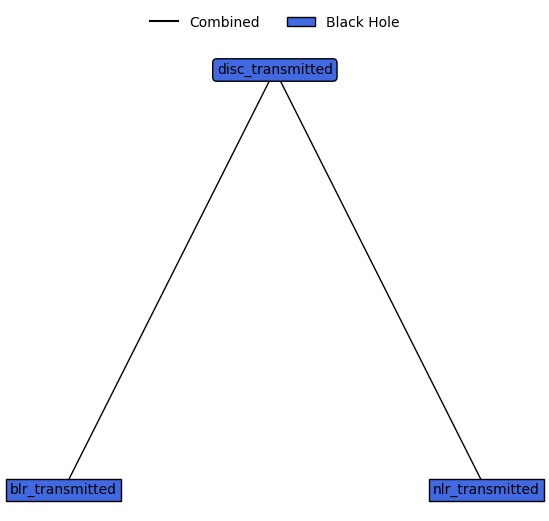

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [6]:
from synthesizer.emission_models import DiscTransmittedEmission

disc_transmitted = DiscTransmittedEmission(
    nlr_grid=nlr_grid,
    blr_grid=blr_grid,
    covering_fraction_nlr=0.1,
    covering_fraction_blr=0.2,
)
print(disc_transmitted)
disc_transmitted.plot_emission_tree()

### DiscEscapedEmission 

The disc escaped emission is the disc incident emission *not* transmitted through the NLR or BLR. A disc escaped model defines the extraction of the ``"incident"`` NLR spectra from an AGN grid, with ``fesc=1 - covering_fraction_nlr - covering_fraction_blr``.

In [7]:
from synthesizer.emission_models import DiscEscapedEmission

disc_escaped = DiscEscapedEmission(
    grid=nlr_grid, covering_fraction_nlr=0.1, covering_fraction_blr=0.2
)
print(disc_escaped)

|=== EmissionModel: disc_escaped ====|
|------------------------------------|
|  DISC_ESCAPED (blackhole)          |
|------------------------------------|
|Extraction model:                   |
|  Grid: test_grid_agn-nlr           |
|  Extract key: incident             |
|  Escape fraction: 0.7              |
|  Save emission: True               |
|====================================|


### DiscEmission

The disc emission is the combined emission from the disc including both the emission transmitted through the line regions and the escaping disc emission. A disc model defines the combination of ``DiscTransmittedEmission`` and ``DiscEscapedEmission``.

|=================== EmissionModel: disc ====================|
|------------------------------------------------------------|
|  DISC_ESCAPED (blackhole)                                  |
|------------------------------------------------------------|
|Extraction model:                                           |
|  Grid: test_grid_agn-nlr                                   |
|  Extract key: incident                                     |
|  Escape fraction: 0.7                                      |
|  Save emission: True                                       |
|------------------------------------------------------------|
|  BLR_TRANSMITTED (blackhole)                               |
|------------------------------------------------------------|
|Extraction model:                                           |
|  Grid: test_grid_agn-blr                                   |
|  Extract key: transmitted                                  |
|  Escape fraction: 0.2                                

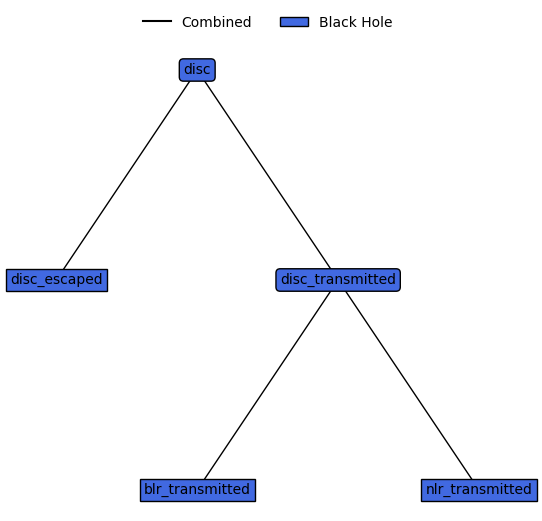

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [8]:
from synthesizer.emission_models import DiscEmission

disc = DiscEmission(
    nlr_grid=nlr_grid,
    blr_grid=blr_grid,
    covering_fraction_nlr=0.1,
    covering_fraction_blr=0.2,
)
print(disc)
disc.plot_emission_tree()

### TorusEmission 

The torus emission is the reprocessed emission from the disc incident on the torus. A torus model defines the generation of a spectra scaled by the `DiscIncidentEmission`, which can either be passed directly, or a grid must be passed and it will be generated.

In [9]:
from synthesizer.emission_models import TorusEmission

torus = TorusEmission(
    torus_emission_model=Blackbody(1000 * kelvin), disc_incident=disc_incident
)
print(torus)

|================================================ EmissionModel: torus ===============================================|
|---------------------------------------------------------------------------------------------------------------------|
|  DISC_INCIDENT (blackhole)                                                                                          |
|---------------------------------------------------------------------------------------------------------------------|
|Extraction model:                                                                                                    |
|  Grid: test_grid_agn-nlr                                                                                            |
|  Extract key: incident                                                                                              |
|  Escape fraction: None                                                                                              |
|  Save emission: True                  

### AGNIntrinsicEmission 

The AGN intrinsic emission is the total emission from an AGN, including the emission from the narrow and broad line regions, disc, and torus. An AGN intrinsic model defines the combination of ``DiscEmission``, ``NLREmission``, ``BLREmission``, and ``TorusEmission``.

|============================================== EmissionModel: intrinsic =============================================|
|---------------------------------------------------------------------------------------------------------------------|
|  DISC_ESCAPED (blackhole)                                                                                           |
|---------------------------------------------------------------------------------------------------------------------|
|Extraction model:                                                                                                    |
|  Grid: test_grid_agn-nlr                                                                                            |
|  Extract key: incident                                                                                              |
|  Escape fraction: 0.7                                                                                               |
|  Save emission: True                  

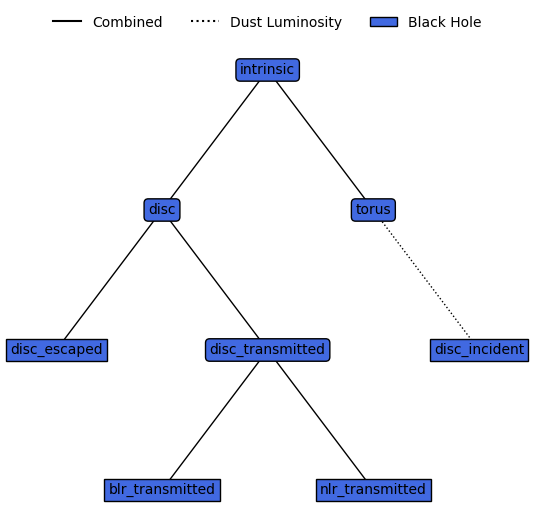

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [10]:
from synthesizer.emission_models import AGNIntrinsicEmission

agn_intrinsic = AGNIntrinsicEmission(
    nlr_grid=nlr_grid,
    blr_grid=blr_grid,
    torus_emission_model=Blackbody(1000 * kelvin),
    covering_fraction_nlr=0.1,
    covering_fraction_blr=0.2,
)
print(agn_intrinsic)
agn_intrinsic.plot_emission_tree()

### UnifiedAGN

The ``UnifiedAGN`` model is similar to the ``AGNIntrinsicEmission`` model, but folds in a lot of extra considerations about the relative geometry of the AGN, both internally and with respect to the observer.

- Disc emission takes into account the inclination of the black hole relative to the angular size of the torus, scaling the amount of observable emission.
- The line region emissions are assumed to be completely isotropic.
- The torus sees the isotropic emission from the disc.
- Only a percentage of the disc emission is transmitted through the line regions.

|============================================== EmissionModel: intrinsic =============================================|
|---------------------------------------------------------------------------------------------------------------------|
|  DISC_ESCAPED (blackhole)                                                                                           |
|---------------------------------------------------------------------------------------------------------------------|
|Extraction model:                                                                                                    |
|  Grid: test_grid_agn-nlr                                                                                            |
|  Extract key: incident                                                                                              |
|  Escape fraction: 0.2                                                                                               |
|  Save emission: True                  

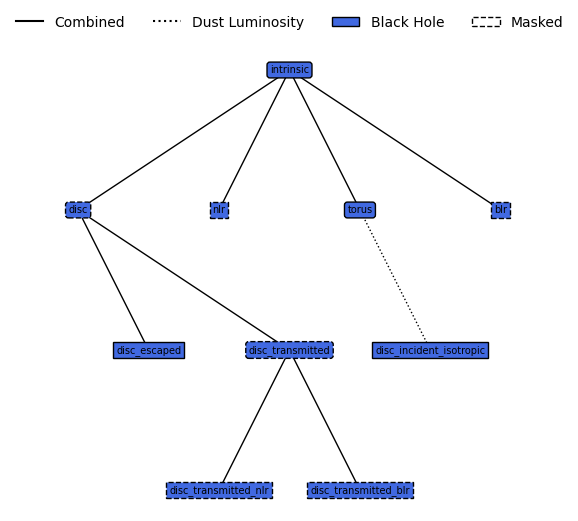

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [11]:
from synthesizer.emission_models import UnifiedAGN

uni_model = UnifiedAGN(
    nlr_grid,
    blr_grid,
    covering_fraction_nlr=0.1,
    covering_fraction_blr=0.1,
    torus_emission_model=Blackbody(1000 * kelvin),
)
print(uni_model)

uni_model.plot_emission_tree(fontsize=7)